# Backtesting of predctions

## Author: Danilo Filippo Reiszel Pereira
Univesidade Federal do Rio de Janeiro

This notebook contains a simulation of trades made based on the predictions performed by several different models

In [1]:
from __future__ import print_function, division
import sys, os
sys.path.append('../../src')
import time 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from neuralstocks.dataacquisition import *
from neuralstocks.plots import *
from neuralstocks.utils import *

%matplotlib inline

# Global Params
Setting global params and useful variables, such as directories and image styling

In [2]:
saveFigDir = '/home/danilofrp/projeto_final/ns-results/backtesting'
if not os.path.exists(saveFigDir): os.makedirs(saveFigDir)

pathABEV3_MLP = '../../../ns-results/data/predicted/MLP/diario/ABEV3/ABEV3_predicted_MLP.CSV'
pathBRFS3_MLP = '../../../ns-results/data/predicted/MLP/diario/BRFS3/BRFS3_predicted_MLP.CSV'
pathBVMF3_MLP = '../../../ns-results/data/predicted/MLP/diario/BVMF3/BVMF3_predicted_MLP.CSV'
pathCCRO3_MLP = '../../../ns-results/data/predicted/MLP/diario/CCRO3/CCRO3_predicted_MLP.CSV'
pathELET3_MLP = '../../../ns-results/data/predicted/MLP/diario/ELET3/ELET3_predicted_MLP.CSV'
pathITUB4_MLP = '../../../ns-results/data/predicted/MLP/diario/ITUB4/ITUB4_predicted_MLP.CSV'
pathKROT3_MLP = '../../../ns-results/data/predicted/MLP/diario/KROT3/KROT3_predicted_MLP.CSV'
pathLAME4_MLP = '../../../ns-results/data/predicted/MLP/diario/LAME4/LAME4_predicted_MLP.CSV'
pathPETR4_MLP = '../../../ns-results/data/predicted/MLP/diario/PETR4/PETR4_predicted_MLP.CSV'
pathSUZB5_MLP = '../../../ns-results/data/predicted/MLP/diario/SUZB5/SUZB5_predicted_MLP.CSV'
pathUSIM5_MLP = '../../../ns-results/data/predicted/MLP/diario/USIM5/USIM5_predicted_MLP.CSV'
pathVALE5_MLP = '../../../ns-results/data/predicted/MLP/diario/VALE5/VALE5_predicted_MLP.CSV'
pathVIVT4_MLP = '../../../ns-results/data/predicted/MLP/diario/VIVT4/VIVT4_predicted_MLP.CSV'

pathABEV3_SAE = '../../../ns-results/data/predicted/SAE/diario/ABEV3/ABEV3_predicted_SAE.CSV'
pathBRFS3_SAE = '../../../ns-results/data/predicted/SAE/diario/BRFS3/BRFS3_predicted_SAE.CSV'
pathBVMF3_SAE = '../../../ns-results/data/predicted/SAE/diario/BVMF3/BVMF3_predicted_SAE.CSV'
pathCCRO3_SAE = '../../../ns-results/data/predicted/SAE/diario/CCRO3/CCRO3_predicted_SAE.CSV'
pathELET3_SAE = '../../../ns-results/data/predicted/SAE/diario/ELET3/ELET3_predicted_SAE.CSV'
pathITUB4_SAE = '../../../ns-results/data/predicted/SAE/diario/ITUB4/ITUB4_predicted_SAE.CSV'
pathKROT3_SAE = '../../../ns-results/data/predicted/SAE/diario/KROT3/KROT3_predicted_SAE.CSV'
pathLAME4_SAE = '../../../ns-results/data/predicted/SAE/diario/LAME4/LAME4_predicted_SAE.CSV'
pathPETR4_SAE = '../../../ns-results/data/predicted/SAE/diario/PETR4/PETR4_predicted_SAE.CSV'
pathSUZB5_SAE = '../../../ns-results/data/predicted/SAE/diario/SUZB5/SUZB5_predicted_SAE.CSV'
pathUSIM5_SAE = '../../../ns-results/data/predicted/SAE/diario/USIM5/USIM5_predicted_SAE.CSV'
pathVALE5_SAE = '../../../ns-results/data/predicted/SAE/diario/VALE5/VALE5_predicted_SAE.CSV'
pathVIVT4_SAE = '../../../ns-results/data/predicted/SAE/diario/VIVT4/VIVT4_predicted_SAE.CSV'

pathABEV3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/ABEV3/ABEV3_bin_predicted_MLP.CSV'
pathBRFS3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/BRFS3/BRFS3_bin_predicted_MLP.CSV'
pathBVMF3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/BVMF3/BVMF3_bin_predicted_MLP.CSV'
pathCCRO3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/CCRO3/CCRO3_bin_predicted_MLP.CSV'
pathELET3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/ELET3/ELET3_bin_predicted_MLP.CSV'
pathITUB4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/ITUB4/ITUB4_bin_predicted_MLP.CSV'
pathKROT3_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/KROT3/KROT3_bin_predicted_MLP.CSV'
pathLAME4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/LAME4/LAME4_bin_predicted_MLP.CSV'
pathPETR4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/PETR4/PETR4_bin_predicted_MLP.CSV'
pathSUZB5_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/SUZB5/SUZB5_bin_predicted_MLP.CSV'
pathUSIM5_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/USIM5/USIM5_bin_predicted_MLP.CSV'
pathVALE5_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/VALE5/VALE5_bin_predicted_MLP.CSV'
pathVIVT4_MLP_class = '../../../ns-results/data/predicted/MLP_class/diario/VIVT4/VIVT4_bin_predicted_MLP.CSV'

pathABEV3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/ABEV3/ABEV3_bin_predicted_SAE.CSV'
pathBRFS3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/BRFS3/BRFS3_bin_predicted_SAE.CSV'
pathBVMF3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/BVMF3/BVMF3_bin_predicted_SAE.CSV'
pathCCRO3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/CCRO3/CCRO3_bin_predicted_SAE.CSV'
pathELET3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/ELET3/ELET3_bin_predicted_SAE.CSV'
pathITUB4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/ITUB4/ITUB4_bin_predicted_SAE.CSV'
pathKROT3_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/KROT3/KROT3_bin_predicted_SAE.CSV'
pathLAME4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/LAME4/LAME4_bin_predicted_SAE.CSV'
pathPETR4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/PETR4/PETR4_bin_predicted_SAE.CSV'
pathSUZB5_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/SUZB5/SUZB5_bin_predicted_SAE.CSV'
pathUSIM5_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/USIM5/USIM5_bin_predicted_SAE.CSV'
pathVALE5_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/VALE5/VALE5_bin_predicted_SAE.CSV'
pathVIVT4_SAE_class = '../../../ns-results/data/predicted/SAE_class/diario/VIVT4/VIVT4_bin_predicted_SAE.CSV'


plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Data Acquisition

In [3]:
init_time = time.time()

ABEV3_MLP = pd.read_csv(pathABEV3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
BRFS3_MLP = pd.read_csv(pathBRFS3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
BVMF3_MLP = pd.read_csv(pathBVMF3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
CCRO3_MLP = pd.read_csv(pathCCRO3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
ELET3_MLP = pd.read_csv(pathELET3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
ITUB4_MLP = pd.read_csv(pathITUB4_MLP, parse_dates=['Date'], index_col='Date').sort_index()
KROT3_MLP = pd.read_csv(pathKROT3_MLP, parse_dates=['Date'], index_col='Date').sort_index()
LAME4_MLP = pd.read_csv(pathLAME4_MLP, parse_dates=['Date'], index_col='Date').sort_index()
PETR4_MLP = pd.read_csv(pathPETR4_MLP, parse_dates=['Date'], index_col='Date').sort_index()
SUZB5_MLP = pd.read_csv(pathSUZB5_MLP, parse_dates=['Date'], index_col='Date').sort_index()
USIM5_MLP = pd.read_csv(pathUSIM5_MLP, parse_dates=['Date'], index_col='Date').sort_index()
VALE5_MLP = pd.read_csv(pathVALE5_MLP, parse_dates=['Date'], index_col='Date').sort_index()
VIVT4_MLP = pd.read_csv(pathVIVT4_MLP, parse_dates=['Date'], index_col='Date').sort_index()

ABEV3_SAE = pd.read_csv(pathABEV3_SAE, parse_dates=['Date'], index_col='Date')[['ABEV3_resid_predicted_SAE_mapminmax', 'ABEV3_Close_predicted_SAE_mapminmax', 'ABEV3_resid_predicted_SAE_mapstd', 'ABEV3_Close_predicted_SAE_mapstd']].sort_index()
BRFS3_SAE = pd.read_csv(pathBRFS3_SAE, parse_dates=['Date'], index_col='Date')[['BRFS3_resid_predicted_SAE_mapminmax', 'BRFS3_Close_predicted_SAE_mapminmax', 'BRFS3_resid_predicted_SAE_mapstd', 'BRFS3_Close_predicted_SAE_mapstd']].sort_index()
BVMF3_SAE = pd.read_csv(pathBVMF3_SAE, parse_dates=['Date'], index_col='Date')[['BVMF3_resid_predicted_SAE_mapminmax', 'BVMF3_Close_predicted_SAE_mapminmax', 'BVMF3_resid_predicted_SAE_mapstd', 'BVMF3_Close_predicted_SAE_mapstd']].sort_index()
CCRO3_SAE = pd.read_csv(pathCCRO3_SAE, parse_dates=['Date'], index_col='Date')[['CCRO3_resid_predicted_SAE_mapminmax', 'CCRO3_Close_predicted_SAE_mapminmax', 'CCRO3_resid_predicted_SAE_mapstd', 'CCRO3_Close_predicted_SAE_mapstd']].sort_index()
ELET3_SAE = pd.read_csv(pathELET3_SAE, parse_dates=['Date'], index_col='Date')[['ELET3_resid_predicted_SAE_mapminmax', 'ELET3_Close_predicted_SAE_mapminmax', 'ELET3_resid_predicted_SAE_mapstd', 'ELET3_Close_predicted_SAE_mapstd']].sort_index()
ITUB4_SAE = pd.read_csv(pathITUB4_SAE, parse_dates=['Date'], index_col='Date')[['ITUB4_resid_predicted_SAE_mapminmax', 'ITUB4_Close_predicted_SAE_mapminmax', 'ITUB4_resid_predicted_SAE_mapstd', 'ITUB4_Close_predicted_SAE_mapstd']].sort_index()
KROT3_SAE = pd.read_csv(pathKROT3_SAE, parse_dates=['Date'], index_col='Date')[['KROT3_resid_predicted_SAE_mapminmax', 'KROT3_Close_predicted_SAE_mapminmax', 'KROT3_resid_predicted_SAE_mapstd', 'KROT3_Close_predicted_SAE_mapstd']].sort_index()
LAME4_SAE = pd.read_csv(pathLAME4_SAE, parse_dates=['Date'], index_col='Date')[['LAME4_resid_predicted_SAE_mapminmax', 'LAME4_Close_predicted_SAE_mapminmax', 'LAME4_resid_predicted_SAE_mapstd', 'LAME4_Close_predicted_SAE_mapstd']].sort_index()
PETR4_SAE = pd.read_csv(pathPETR4_SAE, parse_dates=['Date'], index_col='Date')[['PETR4_resid_predicted_SAE_mapminmax', 'PETR4_Close_predicted_SAE_mapminmax', 'PETR4_resid_predicted_SAE_mapstd', 'PETR4_Close_predicted_SAE_mapstd']].sort_index()
SUZB5_SAE = pd.read_csv(pathSUZB5_SAE, parse_dates=['Date'], index_col='Date')[['SUZB5_resid_predicted_SAE_mapminmax', 'SUZB5_Close_predicted_SAE_mapminmax', 'SUZB5_resid_predicted_SAE_mapstd', 'SUZB5_Close_predicted_SAE_mapstd']].sort_index()
USIM5_SAE = pd.read_csv(pathUSIM5_SAE, parse_dates=['Date'], index_col='Date')[['USIM5_resid_predicted_SAE_mapminmax', 'USIM5_Close_predicted_SAE_mapminmax', 'USIM5_resid_predicted_SAE_mapstd', 'USIM5_Close_predicted_SAE_mapstd']].sort_index()
VALE5_SAE = pd.read_csv(pathVALE5_SAE, parse_dates=['Date'], index_col='Date')[['VALE5_resid_predicted_SAE_mapminmax', 'VALE5_Close_predicted_SAE_mapminmax', 'VALE5_resid_predicted_SAE_mapstd', 'VALE5_Close_predicted_SAE_mapstd']].sort_index()
VIVT4_SAE = pd.read_csv(pathVIVT4_SAE, parse_dates=['Date'], index_col='Date')[['VIVT4_resid_predicted_SAE_mapminmax', 'VIVT4_Close_predicted_SAE_mapminmax', 'VIVT4_resid_predicted_SAE_mapstd', 'VIVT4_Close_predicted_SAE_mapstd']].sort_index()

ABEV3_MLP_class = pd.read_csv(pathABEV3_MLP_class, parse_dates=['Date'], index_col='Date')[['ABEV3_bin_predicted_MLP_mapminmax', 'ABEV3_bin_predicted_MLP_mapstd', 'ABEV3_Close/Open_returns']].sort_index()
BRFS3_MLP_class = pd.read_csv(pathBRFS3_MLP_class, parse_dates=['Date'], index_col='Date')[['BRFS3_bin_predicted_MLP_mapminmax', 'BRFS3_bin_predicted_MLP_mapstd', 'BRFS3_Close/Open_returns']].sort_index()
BVMF3_MLP_class = pd.read_csv(pathBVMF3_MLP_class, parse_dates=['Date'], index_col='Date')[['BVMF3_bin_predicted_MLP_mapminmax', 'BVMF3_bin_predicted_MLP_mapstd', 'BVMF3_Close/Open_returns']].sort_index()
CCRO3_MLP_class = pd.read_csv(pathCCRO3_MLP_class, parse_dates=['Date'], index_col='Date')[['CCRO3_bin_predicted_MLP_mapminmax', 'CCRO3_bin_predicted_MLP_mapstd', 'CCRO3_Close/Open_returns']].sort_index()
ELET3_MLP_class = pd.read_csv(pathELET3_MLP_class, parse_dates=['Date'], index_col='Date')[['ELET3_bin_predicted_MLP_mapminmax', 'ELET3_bin_predicted_MLP_mapstd', 'ELET3_Close/Open_returns']].sort_index()
ITUB4_MLP_class = pd.read_csv(pathITUB4_MLP_class, parse_dates=['Date'], index_col='Date')[['ITUB4_bin_predicted_MLP_mapminmax', 'ITUB4_bin_predicted_MLP_mapstd', 'ITUB4_Close/Open_returns']].sort_index()
KROT3_MLP_class = pd.read_csv(pathKROT3_MLP_class, parse_dates=['Date'], index_col='Date')[['KROT3_bin_predicted_MLP_mapminmax', 'KROT3_bin_predicted_MLP_mapstd', 'KROT3_Close/Open_returns']].sort_index()
LAME4_MLP_class = pd.read_csv(pathLAME4_MLP_class, parse_dates=['Date'], index_col='Date')[['LAME4_bin_predicted_MLP_mapminmax', 'LAME4_bin_predicted_MLP_mapstd', 'LAME4_Close/Open_returns']].sort_index()
PETR4_MLP_class = pd.read_csv(pathPETR4_MLP_class, parse_dates=['Date'], index_col='Date')[['PETR4_bin_predicted_MLP_mapminmax', 'PETR4_bin_predicted_MLP_mapstd', 'PETR4_Close/Open_returns']].sort_index()
SUZB5_MLP_class = pd.read_csv(pathSUZB5_MLP_class, parse_dates=['Date'], index_col='Date')[['SUZB5_bin_predicted_MLP_mapminmax', 'SUZB5_bin_predicted_MLP_mapstd', 'SUZB5_Close/Open_returns']].sort_index()
USIM5_MLP_class = pd.read_csv(pathUSIM5_MLP_class, parse_dates=['Date'], index_col='Date')[['USIM5_bin_predicted_MLP_mapminmax', 'USIM5_bin_predicted_MLP_mapstd', 'USIM5_Close/Open_returns']].sort_index()
VALE5_MLP_class = pd.read_csv(pathVALE5_MLP_class, parse_dates=['Date'], index_col='Date')[['VALE5_bin_predicted_MLP_mapminmax', 'VALE5_bin_predicted_MLP_mapstd', 'VALE5_Close/Open_returns']].sort_index()
VIVT4_MLP_class = pd.read_csv(pathVIVT4_MLP_class, parse_dates=['Date'], index_col='Date')[['VIVT4_bin_predicted_MLP_mapminmax', 'VIVT4_bin_predicted_MLP_mapstd', 'VIVT4_Close/Open_returns']].sort_index()

ABEV3_SAE_class = pd.read_csv(pathABEV3_SAE_class, parse_dates=['Date'], index_col='Date')[['ABEV3_bin_predicted_SAE_mapminmax', 'ABEV3_bin_predicted_SAE_mapstd']].sort_index()
BRFS3_SAE_class = pd.read_csv(pathBRFS3_SAE_class, parse_dates=['Date'], index_col='Date')[['BRFS3_bin_predicted_SAE_mapminmax', 'BRFS3_bin_predicted_SAE_mapstd']].sort_index()
BVMF3_SAE_class = pd.read_csv(pathBVMF3_SAE_class, parse_dates=['Date'], index_col='Date')[['BVMF3_bin_predicted_SAE_mapminmax', 'BVMF3_bin_predicted_SAE_mapstd']].sort_index()
CCRO3_SAE_class = pd.read_csv(pathCCRO3_SAE_class, parse_dates=['Date'], index_col='Date')[['CCRO3_bin_predicted_SAE_mapminmax', 'CCRO3_bin_predicted_SAE_mapstd']].sort_index()
ELET3_SAE_class = pd.read_csv(pathELET3_SAE_class, parse_dates=['Date'], index_col='Date')[['ELET3_bin_predicted_SAE_mapminmax', 'ELET3_bin_predicted_SAE_mapstd']].sort_index()
ITUB4_SAE_class = pd.read_csv(pathITUB4_SAE_class, parse_dates=['Date'], index_col='Date')[['ITUB4_bin_predicted_SAE_mapminmax', 'ITUB4_bin_predicted_SAE_mapstd']].sort_index()
KROT3_SAE_class = pd.read_csv(pathKROT3_SAE_class, parse_dates=['Date'], index_col='Date')[['KROT3_bin_predicted_SAE_mapminmax', 'KROT3_bin_predicted_SAE_mapstd']].sort_index()
LAME4_SAE_class = pd.read_csv(pathLAME4_SAE_class, parse_dates=['Date'], index_col='Date')[['LAME4_bin_predicted_SAE_mapminmax', 'LAME4_bin_predicted_SAE_mapstd']].sort_index()
PETR4_SAE_class = pd.read_csv(pathPETR4_SAE_class, parse_dates=['Date'], index_col='Date')[['PETR4_bin_predicted_SAE_mapminmax', 'PETR4_bin_predicted_SAE_mapstd']].sort_index()
SUZB5_SAE_class = pd.read_csv(pathSUZB5_SAE_class, parse_dates=['Date'], index_col='Date')[['SUZB5_bin_predicted_SAE_mapminmax', 'SUZB5_bin_predicted_SAE_mapstd']].sort_index()
USIM5_SAE_class = pd.read_csv(pathUSIM5_SAE_class, parse_dates=['Date'], index_col='Date')[['USIM5_bin_predicted_SAE_mapminmax', 'USIM5_bin_predicted_SAE_mapstd']].sort_index()
VALE5_SAE_class = pd.read_csv(pathVALE5_SAE_class, parse_dates=['Date'], index_col='Date')[['VALE5_bin_predicted_SAE_mapminmax', 'VALE5_bin_predicted_SAE_mapstd']].sort_index()
VIVT4_SAE_class = pd.read_csv(pathVIVT4_SAE_class, parse_dates=['Date'], index_col='Date')[['VIVT4_bin_predicted_SAE_mapminmax', 'VIVT4_bin_predicted_SAE_mapstd']].sort_index()

ABEV3_MLP_class['ABEV3_bin_returns'] = np.sign(ABEV3_MLP_class['ABEV3_Close/Open_returns'])
BRFS3_MLP_class['BRFS3_bin_returns'] = np.sign(BRFS3_MLP_class['BRFS3_Close/Open_returns'])
BVMF3_MLP_class['BVMF3_bin_returns'] = np.sign(BVMF3_MLP_class['BVMF3_Close/Open_returns'])
CCRO3_MLP_class['CCRO3_bin_returns'] = np.sign(CCRO3_MLP_class['CCRO3_Close/Open_returns'])
ELET3_MLP_class['ELET3_bin_returns'] = np.sign(ELET3_MLP_class['ELET3_Close/Open_returns'])
ITUB4_MLP_class['ITUB4_bin_returns'] = np.sign(ITUB4_MLP_class['ITUB4_Close/Open_returns'])
KROT3_MLP_class['KROT3_bin_returns'] = np.sign(KROT3_MLP_class['KROT3_Close/Open_returns'])
LAME4_MLP_class['LAME4_bin_returns'] = np.sign(LAME4_MLP_class['LAME4_Close/Open_returns'])
PETR4_MLP_class['PETR4_bin_returns'] = np.sign(PETR4_MLP_class['PETR4_Close/Open_returns'])
SUZB5_MLP_class['SUZB5_bin_returns'] = np.sign(SUZB5_MLP_class['SUZB5_Close/Open_returns'])
USIM5_MLP_class['USIM5_bin_returns'] = np.sign(USIM5_MLP_class['USIM5_Close/Open_returns'])
VALE5_MLP_class['VALE5_bin_returns'] = np.sign(VALE5_MLP_class['VALE5_Close/Open_returns'])
VIVT4_MLP_class['VIVT4_bin_returns'] = np.sign(VIVT4_MLP_class['VIVT4_Close/Open_returns'])

df = pd.concat([ABEV3_MLP, ABEV3_SAE, ABEV3_MLP_class, ABEV3_SAE_class,
                BRFS3_MLP, BRFS3_SAE, BRFS3_MLP_class, BRFS3_SAE_class,
                BVMF3_MLP, BVMF3_SAE, BVMF3_MLP_class, BVMF3_SAE_class,
                CCRO3_MLP, CCRO3_SAE, CCRO3_MLP_class, CCRO3_SAE_class,
                ELET3_MLP, ELET3_SAE, ELET3_MLP_class, ELET3_SAE_class,
                ITUB4_MLP, ITUB4_SAE, ITUB4_MLP_class, ITUB4_SAE_class,
                KROT3_MLP, KROT3_SAE, KROT3_MLP_class, KROT3_SAE_class,
                LAME4_MLP, LAME4_SAE, LAME4_MLP_class, LAME4_SAE_class,
                PETR4_MLP, PETR4_SAE, PETR4_MLP_class, PETR4_SAE_class,
                SUZB5_MLP, SUZB5_SAE, SUZB5_MLP_class, SUZB5_SAE_class,
                USIM5_MLP, USIM5_SAE, USIM5_MLP_class, USIM5_SAE_class,
                VALE5_MLP, VALE5_SAE, VALE5_MLP_class, VALE5_SAE_class,
                VIVT4_MLP, VIVT4_SAE, VIVT4_MLP_class, VIVT4_SAE_class],
               axis = 1)

end_time = time.time()
print('Time to acquire data: '+str(end_time-init_time)+' seconds')

df.columns[:(len(df.columns)//13)]

Time to acquire data: 0.735017061234 seconds


Index([u'ABEV3_Close', u'ABEV3_Open', u'ABEV3_High', u'ABEV3_Low',
       u'ABEV3_Volume', u'ABEV3_Close_trend', u'ABEV3_Close_resid',
       u'ABEV3_resid_predicted_MLP_mapminmax',
       u'ABEV3_Close_predicted_MLP_mapminmax',
       u'ABEV3_resid_predicted_MLP_mapstd',
       u'ABEV3_Close_predicted_MLP_mapstd',
       u'ABEV3_resid_predicted_SAE_mapminmax',
       u'ABEV3_Close_predicted_SAE_mapminmax',
       u'ABEV3_resid_predicted_SAE_mapstd',
       u'ABEV3_Close_predicted_SAE_mapstd',
       u'ABEV3_bin_predicted_MLP_mapminmax', u'ABEV3_bin_predicted_MLP_mapstd',
       u'ABEV3_Close/Open_returns', u'ABEV3_bin_returns',
       u'ABEV3_bin_predicted_SAE_mapminmax',
       u'ABEV3_bin_predicted_SAE_mapstd'],
      dtype='object')

In [ ]:
p = ('2017', '2017')
print('PETR4 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]]))))
print('PETR4 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('PETR4 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('PETR4 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('PETR4 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('PETR4 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]])))
print('PETR4 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('PETR4 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('PETR4 trend           prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_trend'][p[0]:p[1]])))
print('PETR4 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('PETR4 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['PETR4_Close'][p[0]:p[1]], df['PETR4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('PETR4 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('PETR4 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('PETR4 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['PETR4_bin_returns'][p[0]:p[1]], df['PETR4_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('ITUB4 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]]))))
print('ITUB4 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('ITUB4 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('ITUB4 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('ITUB4 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('ITUB4 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]])))
print('ITUB4 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ITUB4 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ITUB4 trend           prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_trend'][p[0]:p[1]])))
print('ITUB4 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ITUB4 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['ITUB4_Close'][p[0]:p[1]], df['ITUB4_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ITUB4 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ITUB4 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ITUB4 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ITUB4_bin_returns'][p[0]:p[1]], df['ITUB4_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('VALE5 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]]))))
print('VALE5 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('VALE5 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('VALE5 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('VALE5 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('VALE5 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]])))
print('VALE5 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('VALE5 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('VALE5 trend           prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_trend'][p[0]:p[1]])))
print('VALE5 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('VALE5 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['VALE5_Close'][p[0]:p[1]], df['VALE5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('VALE5 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('VALE5 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('VALE5 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['VALE5_bin_returns'][p[0]:p[1]], df['VALE5_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('SUZB5 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_trend'][p[0]:p[1]]))))
print('SUZB5 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('SUZB5 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('SUZB5 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('SUZB5 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('SUZB5 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_trend'][p[0]:p[1]])))
print('SUZB5 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('SUZB5 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('SUZB5 trend           prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_trend'][p[0]:p[1]])))
print('SUZB5 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('SUZB5 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['SUZB5_Close'][p[0]:p[1]], df['SUZB5_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('SUZB5 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('SUZB5 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('SUZB5 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['SUZB5_bin_returns'][p[0]:p[1]], df['SUZB5_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [ ]:
p = ('2017', '2017')
print('ELET3 trend           prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_trend'][p[0]:p[1]]))))
print('ELET3 trend + ANNnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapminmax'][p[0]:p[1]]))))
print('ELET3 trend + ANNstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapstd'][p[0]:p[1]]))))
print('ELET3 trend + SAEnorm prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapminmax'][p[0]:p[1]]))))
print('ELET3 trend + SAEstd  prediction RMSE: {:.5f}'.format(np.sqrt(mean_squared_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapstd'][p[0]:p[1]]))))
print('----------------------------------------------')
print('ELET3 trend           prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_trend'][p[0]:p[1]])))
print('ELET3 trend + ANNnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + ANNstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ELET3 trend + SAEnorm prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + SAEstd  prediction MAE:  {:.5f}'.format(mean_absolute_error(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ELET3 trend           prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_trend'][p[0]:p[1]])))
print('ELET3 trend + ANNnorm prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + ANNstd  prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ELET3 trend + SAEnorm prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + SAEstd  prediction R2s:  {:.5f}'.format(r2_score(df['ELET3_Close'][p[0]:p[1]], df['ELET3_Close_predicted_SAE_mapstd'][p[0]:p[1]])))
print('----------------------------------------------')
print('ELET3 trend + ANNnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_MLP_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + ANNstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_MLP_mapstd'][p[0]:p[1]])))
print('ELET3 trend + SAEnorm prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_SAE_mapminmax'][p[0]:p[1]])))
print('ELET3 trend + SAEstd  prediction Acc:  {:.5f}'.format(computeAccuracy(df['ELET3_bin_returns'][p[0]:p[1]], df['ELET3_bin_predicted_SAE_mapstd'][p[0]:p[1]])))

In [4]:
from __future__ import division
import random
from collections import defaultdict
from datetime import timedelta
from matplotlib.ticker import EngFormatter

class Backtest:
    oneDay = timedelta(days = 1)
    
    def __init__(self, assets, dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV', initialFunds = 100000, 
                 brokerage = 6.0, transactionFees = 0.000325, ISStax = 0.05):
        self.assets = assets
        self.assetsToUse = assets
        self.dataPath = dataPath
        self.funds = initialFunds
        self.initialFunds = initialFunds
        self.brokerage = brokerage
        self.transactionFees = transactionFees
        self.ISStax = ISStax
        
        self.history = {}
        self.dailyData = {}
        self.verbose = 0;
        self.shortedFunds = 0
        self.pendingOperations = []
        self.openPositions = []
        self.strategy = ''
        self.predictedValues = {}
        self.orders = {}
        self.confidenceLimit = 0.0
        
        self.useRiskManagement = False
        self.stopLoss = None
        self.stopGain = None
        self.maxExposure = None
        self.maxTotalExposure = None
        
        self.loadData()
        
    def setRiskManagement(self, stopLoss = None, stopGain = None, maxExposure = None, maxTotalExposure = None, useRiskManagement = True):
        self.useRiskManagement = useRiskManagement
        self.stopLoss = stopLoss
        self.stopGain = stopGain
        self.maxExposure = maxExposure
        self.maxTotalExposure = maxTotalExposure
        
    def loadData(self):
        for asset in self.assets:
            filePath = self.dataPath.replace('[asset]', asset)
            df = pd.read_csv(filePath, delimiter=';', decimal=',',
                     parse_dates=['Date'], dayfirst=True, index_col='Date').sort_index()
            self.dailyData[asset] = df
    
    def simulate(self, initialFunds, strategy = 'buy-n-hold', start = None, end = None, longOnly = False, 
                 predicted = None, orders = None, confidenceLimit = 0.0, 
                 simulationName = None, assetsToUse = None, verbose = 0):            
        self.assetsToUse = self.assets if not assetsToUse else assetsToUse
        simulationName = simulationName if simulationName else strategy
        print('Starting {} simulation with {}'.format(simulationName, self.assetsToUse))
        self.strategy = strategy
        self.funds = initialFunds
        self.initialFunds = initialFunds
        self.confidenceLimit = confidenceLimit
        self.verbose = verbose
        if strategy == 'buy-n-hold':
            self.buyNHold(start, end)
        elif strategy == 'repeatLast':
            pass
        elif strategy == 'predicted':
            if predicted:
                assetsToRemove = []
                for asset in self.assetsToUse:
                    if not asset in predicted:
                        assetsToRemove.append(asset)
                        #del self.assetsToUse[asset]
                        print('Warning: No predictions for {}. This asset will be excluded from the simulation.'.format(asset))
                    else:
                        self.predictedValues[asset] = predicted[asset]
                self.assetsToUse = list(set(self.assetsToUse).symmetric_difference(set(assetsToRemove)))
            if self.predictedValues:
                self.simulatePredicted(start, end, simulationName)
            else:
                print('No predicted values given for the selected assets')
            self.predictedValues = {}
        elif strategy == 'orders':
            if orders:
                assetsToRemove = []
                for asset in self.assetsToUse:
                    if not asset in orders:
                        assetsToRemove.append(asset)
                        #del self.assetsToUse[asset]
                        print('Warning: No orders for {}. This asset will be excluded from the simulation.'.format(asset))
                    else:
                        self.orders[asset] = orders[asset]
                self.assetsToUse = list(set(self.assetsToUse).symmetric_difference(set(assetsToRemove)))
            if self.orders:
                self.simulateOrders(start, end, simulationName)
            else:
                print('No orders cue given for the selected assets')
            self.predictedValues = {}
        else:
            print('Selected strategy not recognized')
    
    def buyNHold(self, start, end):
        self.history['buy-n-hold'] = pd.DataFrame(index=self.dailyData[self.assetsToUse[0]][start:end].index, columns=['portfolioValue'])
        maxValue = self.funds / len(self.assetsToUse)
        random.shuffle(self.assetsToUse)
        date = self.dailyData[self.assetsToUse[0]][start:end].index[0]
        print('Portfolio value at start: {:.2f} BRL'.format(self.funds))
        previousPortfolioValue = self.funds
        #buy all
        for asset in self.assetsToUse:
            self.buy(asset = asset, date = self.dailyData[asset][start:end].index[0], limitValue = maxValue)
        self.history['buy-n-hold'].at[date, 'portfolioValue'] = self.funds
        #evaluate portfolio value for each trading day
        for d in self.dailyData[self.assetsToUse[0]][start:end].index:
            date = d
            self.history['buy-n-hold'].at[date, 'portfolioValue'] = self.evaluatePortfolio(date)
            if self.verbose >= 1:
                print('Portfolio value at {} market close: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), self.history['buy-n-hold']['portfolioValue'][date]))
        #sell all
        self.liquidateAll(date)
        print('Portfolio value at end: {:.2f} BRL'.format(self.funds))
        self.calculateDrawdown('buy-n-hold')
        
    def simulatePredicted(self, start, end, simulationName = 'predicted'):
        self.history[simulationName] = pd.DataFrame(index=self.dailyData[self.assetsToUse[0]][start:end].index, columns=['portfolioValue'])
        maxValue = self.funds / len(self.assetsToUse)
        date = self.dailyData[self.assetsToUse[0]][start:end].index[0]
        print('Portfolio value at start: {:.2f} BRL'.format(self.funds))
        self.history[simulationName].at[date, 'portfolioValue'] = self.funds
        # simulate for every day in the simulation period
        for d in self.dailyData[self.assetsToUse[0]][start:end].index:
            date = d
            #self.history[simulationName].at[date, 'portfolioValue'] = self.evaluatePortfolio(date)
            self.decideOperations(date)
            self.executeOperations(maxValue)
            self.liquidateAll()
            maxValue = self.funds / len(self.assetsToUse)
            self.history[simulationName].at[date, 'portfolioValue'] = self.evaluatePortfolio(date)
            if self.verbose >= 1:
                print('Portfolio value at {} market close: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), self.history[simulationName]['portfolioValue'][date]))
        print('Portfolio value at end: {:.2f} BRL'.format(self.funds))
        self.calculateDrawdown(simulationName)
             
    def decideOperations(self, date):
        for asset in self.assetsToUse:
            op = self.evaluateOperation(date, asset)
            if op == 'long' or op == 'short':
                self.pendingOperations.append(self.createPosition(asset, op, -1, -1, date))
            if op == 'skip':
                if self.verbose >= 2:
                    print('{} - Skipped {}, no profit predicted'.format(date.strftime('%Y-%m-%d'), asset))
                
    def evaluateOperation(self, date, asset):
        if np.isnan(self.dailyData[asset]['Close'][date]) or np.isnan(self.dailyData[asset]['Open'][date]):
            op = 'skip'
        elif self.predictedValues[asset][date] > self.dailyData[asset]['Close'][:date][-2]:# + 0.05:
            op = 'long'
        elif self.predictedValues[asset][date] < self.dailyData[asset]['Close'][:date][-2]:# - 0.05:
            op = 'short'
        else:
            op = 'skip'
        if self.verbose >= 2:
            print('{} - Close price at {}: {:.2f}. Predicted at {}: {:.2f}. Decided operation: {}'.format(asset, self.dailyData[asset]['Close'][:date].index[-2].strftime('%Y-%m-%d'), self.dailyData[asset]['Close'][:date][-2], date.strftime('%Y-%m-%d'), self.predictedValues[asset][date], op))
        return op
    
    def simulateOrders(self, start, end, simulationName = 'orders'):
        self.history[simulationName] = pd.DataFrame(index=self.dailyData[self.assetsToUse[0]][start:end].index, columns=['portfolioValue'])
        maxValue = self.funds / len(self.assetsToUse)
        date = self.dailyData[self.assetsToUse[0]][start:end].index[0]
        print('Portfolio value at start: {:.2f} BRL'.format(self.funds))
        self.history[simulationName].at[date, 'portfolioValue'] = self.funds
        # simulate for every day in the simulation period
        for d in self.dailyData[self.assetsToUse[0]][start:end].index:
            date = d
            #self.history[simulationName].at[date, 'portfolioValue'] = self.evaluatePortfolio(date)
            self.decideOrder(date)
            self.executeOperations(maxValue)
            self.liquidateAll()
            maxValue = self.funds / len(self.assetsToUse)
            self.history[simulationName].at[date, 'portfolioValue'] = self.evaluatePortfolio(date)
            if self.verbose >= 1:
                print('Portfolio value at {} market close: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), self.history[simulationName]['portfolioValue'][date]))
        print('Portfolio value at end: {:.2f} BRL'.format(self.funds))
        self.calculateDrawdown(simulationName)
    
    def decideOrder(self, date):
        for asset in self.assetsToUse:
            op = self.evaluateOrder(date, asset)
            if op == 'long' or op == 'short':
                self.pendingOperations.append(self.createPosition(asset, op, -1, -1, date))
            if op == 'skip':
                if self.verbose >= 2:
                    print('{} - Skipped {}, no profit predicted'.format(date.strftime('%Y-%m-%d'), asset))
                
    def evaluateOrder(self, date, asset):
        if np.isnan(self.dailyData[asset]['Close'][date]) or np.isnan(self.dailyData[asset]['Open'][date]):
            op = 'skip'
        elif (self.orders[asset][date] > self.confidenceLimit):
            op = 'long'
        elif (self.orders[asset][date] < (-self.confidenceLimit)):
            op = 'short'
        else:
            op = 'skip'
        if self.verbose >= 2:
            print('{} - Close price at {}: {:.2f}. Predicted movement at {}: {:.4f}. Decided operation: {}'.format(asset, self.dailyData[asset]['Close'][:date].index[-2].strftime('%Y-%m-%d'), self.dailyData[asset]['Close'][:date][-2], date.strftime('%Y-%m-%d'), self.orders[asset][date], op))
        return op
        
    def executeOperations(self, maxValue):
        for i in range(len(self.pendingOperations)):
            op = self.pendingOperations.pop(0)
            if op['opType'] == 'long':
                self.buy(op['asset'], op['date'], limitValue = maxValue)
            elif op['opType'] == 'short':
                self.sell(op['asset'], op['date'], limitValue = maxValue)
                
    def liquidateAll(self, date = None):
        for i in range(len(self.openPositions)):
            pos = self.openPositions[0] # always 0 because entries will be popped by buy or sell operations
            if pos['opType'] == 'long':
                self.sell(pos['asset'], date = date)
            elif pos['opType'] == 'short':
                self.buy(pos['asset'], date = date)
    
    def buy(self, asset, date = None, volume = None, limitValue = None):
        # check if a short operation with this asset exists, liquidate if so
        if len(filter(lambda op: op['asset'] == asset and op['opType'] == 'short', self.openPositions)) > 0:
            operation = self.openPositions.pop(findIndex(self.openPositions, asset, lambda x, y: x['asset'] == y))
            date = date if date else operation['date']
            price = self.dailyData[asset]['Close'][date] - 0.01
            buyValue = operation['volume'] * price
            fees = self.brokerage + (buyValue * self.transactionFees) + (self.brokerage * self.ISStax)
            self.funds = self.funds - buyValue - fees
            if self.verbose >= 2:
                print('{} Close - Bought {} {}. price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), operation['volume'], asset, price, fees, buyValue + fees))
        else: #longs the stock
            price = self.dailyData[asset]['Open'][date] + 0.01
            if not volume and not limitValue:
                print('{} - Error buying {} - Neither volume nor limitValue were specified'.format(date, asset))
            else:
                limitVolume = int(((limitValue/price)//100)*100)
                volume = volume if volume else limitVolume
                buyValue = volume * price
                fees = self.brokerage + (buyValue * self.transactionFees) + (self.brokerage * self.ISStax)
                self.openPositions.append(self.createPosition(asset, 'long', volume, price, date))
                self.funds = self.funds - buyValue - fees
                if self.verbose >= 2:
                    print('{} Open -  Bought {} {}. price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), volume, asset, price, fees, buyValue + fees))
                
    def sell(self, asset, date = None, volume = None, limitValue = None):
        # check if a long operation with this asset exists, liquidate if so
        if len(filter(lambda op: op['asset'] == asset and op['opType'] == 'long', self.openPositions)) > 0:
            operation = self.openPositions.pop(findIndex(self.openPositions, asset, lambda x, y: x['asset'] == y))
            date = date if date else operation['date']
            price = self.dailyData[asset]['Close'][date] - 0.01
            sellValue = operation['volume'] * price
            fees = self.brokerage + (sellValue * self.transactionFees) + (self.brokerage * self.ISStax)
            self.funds = self.funds + sellValue - fees
            if self.verbose >= 2:
                print('{} Close -  Sold  {} {}. price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), operation['volume'], asset, price, fees, sellValue + fees))
        else: # shorts the stock
            price = self.dailyData[asset]['Open'][date] + 0.01
            if not volume and not limitValue:
                print('{} - Error shorting {} - Neither volume nor limitValue were specified'.format(date, asset))
            else:
                limitVolume = int(((limitValue/price)//100)*100)
                volume = volume if volume else limitVolume
                sellValue = volume * price
                fees = self.brokerage + (sellValue * self.transactionFees) + (self.brokerage * self.ISStax)
                self.openPositions.append(self.createPosition(asset, 'short', volume, price, date))
                self.funds = self.funds + sellValue - fees
                if self.verbose >= 2:
                    print('{} Open - Shorted {} {}. price: {} BRL, fees: {:.2f}, total: {:.2f} BRL'.format(date.strftime('%Y-%m-%d'), volume, asset, price, fees, sellValue + fees))
           
    def createPosition(self, asset, opType, volume, price, date = None):
        return {'asset': asset, 'opType': opType, 'volume': volume, 'price': price, 'date': date}
    
    def evaluatePortfolio(self, date, moment = 'Close'):
        if self.verbose >= 3: print('[-] PORTFOLIO CALCULATION ({}):'.format(date.strftime('%Y-%m-%d')))
        if self.verbose >= 3: print('Funds_________________________:{}'.format(self.funds))
        if self.verbose >= 3: print('Shorted Funds_________________:{}'.format(self.shortedFunds))
        portfolio = self.funds + self.shortedFunds
        for l in filter(lambda x: x['opType'] == 'long', self.openPositions):
            if self.verbose >= 3: print('{} Long____________________:{}'.format(l['asset'], l['volume'] * self.dailyData[l['asset']][moment][date]))
            portfolio += l['volume'] * self.dailyData[l['asset']][moment][date]
        for s in filter(lambda x: x['opType'] == 'short', self.openPositions):
            if self.verbose >= 3: print('{} Short___________________:{}'.format(s['asset'], -s['volume'] * self.dailyData[l['asset']][moment][date]))
            portfolio -= s['volume'] * self.dailyData[s['asset']][moment][date]
        return portfolio

    def calculateDrawdown(self, simulationName):
        simulationName = simulationName if simulationName else self.strategy
        if self.history[simulationName] is not None and self.history[simulationName]['portfolioValue'] is not None:
            drawdown = (self.history[simulationName]['portfolioValue'] - np.maximum.accumulate(self.history[simulationName]['portfolioValue']))/np.maximum.accumulate(self.history[simulationName]['portfolioValue'])
            self.history[simulationName] = self.history[simulationName].assign(drawdown = drawdown)
            
    def plotSimulations(self, simulations = None, names = None, title = None, ylabel = None, initialPlotDate = None, finalPlotDate = None, figsize = (10,6), legendsize = 12, linestyle = '-', linewidth = 2.0, legendncol = 3, saveImg = False, saveDir = '', saveName = '', saveFormat = 'pdf'):
        if len(self.history) == 0:
            print('No saved simulations found!')
            return None
        initialPlotDate = self.history[self.history.keys()[0]]['portfolioValue'][initialPlotDate:].index[0]
        finalPlotDate = self.history[self.history.keys()[0]]['portfolioValue'][:finalPlotDate].index[-1]
        if not title:
            title = 'Portfolio Value'
        if not ylabel:
            ylabel = 'BRL'

        fig, ax = plt.subplots(figsize=figsize, nrows = 1, ncols = 1)
        fig.suptitle(title)
        ax.set_xlabel('Date')
        ax.set_ylabel(ylabel)
        simulationsToPlot = len(simulations) if simulations is not None else len(self.history)
        simulations = simulations if simulations is not None else list(self.history.keys())
        if names is None:
            names = simulations
        formatter = EngFormatter(unit='')
        ax.yaxis.set_major_formatter(formatter)
        for i in range(simulationsToPlot):
            s = self.history[simulations[i]]['portfolioValue']
            d = pd.date_range(start=s[initialPlotDate:finalPlotDate].index[0], end=s[initialPlotDate:finalPlotDate].index[-1], freq="B")
            ax.plot(np.arange(len(s[initialPlotDate:finalPlotDate])), s[initialPlotDate:finalPlotDate], linestyle, label = names[i], linewidth = linewidth)
            xticks = ax.get_xticks()
            ax.set_xticks(xticks)
            xticklabels = [(d[0] + x).strftime('%Y-%m') for x in xticks.astype(int)]
            ax.set_xticklabels(xticklabels)
        ax.plot(np.arange(len(s[initialPlotDate:finalPlotDate])), self.initialFunds * np.ones(np.arange(len(s[initialPlotDate:finalPlotDate])).shape), 'k--', linewidth=linewidth)
        ax.autoscale(True, axis='x')
        fig.autofmt_xdate()
        ax.grid()
        plt.legend(bbox_to_anchor=(0., 1.00, 1., .102), loc=3, ncol=legendncol, mode="expand", borderaxespad=0., prop={'size': legendsize}, frameon=False)
        if saveImg:
            saveName = saveName if saveName else '{}'.format(s[0].name)
            fig.savefig('{}/{}.png'.format(saveDir, saveName), bbox_inches='tight')
            fig.savefig('{}/{}.pdf'.format(saveDir, saveName), bbox_inches='tight')
        return fig, ax
    
    def plotDrawdown(self, simulations = None, names = None, title = None, ylabel = None, initialPlotDate = None, finalPlotDate = None, figsize = (10,6), legendsize = 12, linestyle = '-', linewidth = 2.0, legendncol = 3, saveImg = False, saveDir = '', saveName = '', saveFormat = 'pdf'):
        if len(self.history) == 0:
            print('No saved simulations found!')
            return None
        initialPlotDate = self.history[self.history.keys()[0]]['portfolioValue'][initialPlotDate:].index[0]
        finalPlotDate = self.history[self.history.keys()[0]]['portfolioValue'][:finalPlotDate].index[-1]
        if not title:
            title = 'Drawdown'
        if not ylabel:
            ylabel = '%'

        fig, ax = plt.subplots(figsize=figsize, nrows = 1, ncols = 1)
        fig.suptitle(title)
        ax.set_xlabel('Date')
        ax.set_ylabel(ylabel)
        simulationsToPlot = len(simulations) if simulations is not None else len(self.history)
        simulations = simulations if simulations is not None else list(self.history.keys())
        if names is None:
            names = simulations

        for i in range(simulationsToPlot):
            s = 100*self.history[simulations[i]]['drawdown']
            d = pd.date_range(start=s[initialPlotDate:finalPlotDate].index[0], end=s[initialPlotDate:finalPlotDate].index[-1], freq="B")
            ax.plot(np.arange(len(s[initialPlotDate:finalPlotDate])), s[initialPlotDate:finalPlotDate], linestyle, label = names[i], linewidth = linewidth)
            xticks = ax.get_xticks()
            ax.set_xticks(xticks)
            xticklabels = [(d[0] + x).strftime('%Y-%m') for x in xticks.astype(int)]
            ax.set_xticklabels(xticklabels)
        ax.autoscale(True, axis='x')
        fig.autofmt_xdate()
        ax.grid()
        plt.legend(bbox_to_anchor=(0., 1.00, 1., .102), loc=3, ncol=legendncol, mode="expand", borderaxespad=0., prop={'size': legendsize}, frameon=False)
        if saveImg:
            saveName = saveName if saveName else '{}'.format(s[0].name)
            fig.savefig('{}/{}.png'.format(saveDir, saveName), bbox_inches='tight')
            fig.savefig('{}/{}.pdf'.format(saveDir, saveName), bbox_inches='tight')
        return fig, ax        
    
class Position:
    asset_index = defaultdict(object)
    
    def __init__(self, asset, opType, volume, price, date = None):
        self.asset = asset
        self.opType = opType
        self.volume = volume
        self.price = price
        self.date = date
        Position.asset_index[asset] = self
    
    def __getitem__(self, key):
        if key == 'asset':
            return self.asset
        elif key == 'opType':
            return self.opType
        elif key == 'volume':
            return self.volume
        elif key == 'price':
            return self.price
        elif key == 'date':
            return self.date
        else:
            return None
        
    @classmethod
    def findByAsset(cls, asset):
        return Position.asset_index[asset]

    @classmethod
    def getByAsset(cls, asset):
        return Position.asset_index.pop(asset, None)

def findIndex(array, obj, func):
    for i in range(len(array)):
        if func(array[i], obj):
            return i
    return -1

In [5]:
bt = Backtest(assets = ['ABEV3', 'BRFS3', 'BVMF3', 'CCRO3', 'ELET3', 'ITUB4', 'KROT3', 'LAME4', 'PETR4', 'SUZB5', 'USIM5', 'VALE5', 'VIVT4'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')

Starting buy-n-hold simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 121937.25 BRL
Starting predicted_trend simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 101288.21 BRL
Starting predicted_mlp_minmax simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 117876.83 BRL
Starting predicted_mlp_std simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 106193.89 BRL
Starting predicted_sae_minmax simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 90701.02 BRL
Starting predicted_sae_std simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 80681.48 BRL
Starting predicted_bin_mlp_minmax simulation with ['ABEV3']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 96348.10 BRL
Starting predicted_bin_mlp_std simulation with ['ABEV3']
Portfolio value at start:

(<matplotlib.figure.Figure at 0x7f86dad591d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f86dad799d0>)

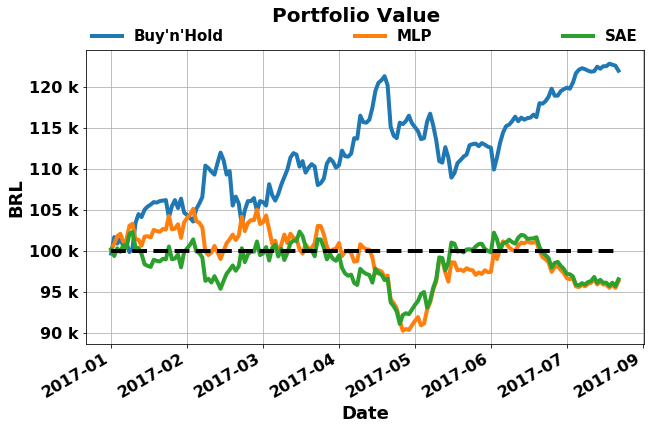

In [13]:
initialFunds = 100000
startDate = '2017'
endDate = '2017'
assetsToUse = [
               'ABEV3', 
               #'BRFS3', 
               #'BVMF3',
               #'CCRO3',
               #'ELET3',
               #'ITUB4', 
               #'KROT3', 
               #'LAME4', 
               #'PETR4', 
               #'SUZB5', 
               #'USIM5', 
               #'VALE5',
               #'VIVT4'
              ]

bt.simulate(strategy = 'buy-n-hold', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse, verbose = 0)

bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {
                         'ABEV3': df['ABEV3_Close_trend'],
                         'BRFS3': df['BRFS3_Close_trend'],
                         'BVMF3': df['BVMF3_Close_trend'],
                         'CCRO3': df['CCRO3_Close_trend'],
                         'ELET3': df['ELET3_Close_trend'],
                         'ITUB4': df['ITUB4_Close_trend'],
                         'KROT3': df['KROT3_Close_trend'],
                         'LAME4': df['LAME4_Close_trend'],
                         'PETR4': df['PETR4_Close_trend'],
                         'SUZB5': df['SUZB5_Close_trend'],
                         'USIM5': df['USIM5_Close_trend'],
                         'VALE5': df['VALE5_Close_trend'],
                         'VIVT4': df['VIVT4_Close_trend']
                        },
            simulationName = 'predicted_trend', verbose = 0)

bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {
                         'ABEV3': df['ABEV3_Close_predicted_MLP_mapminmax'],
                         'BRFS3': df['BRFS3_Close_predicted_MLP_mapminmax'],
                         'BVMF3': df['BVMF3_Close_predicted_MLP_mapminmax'],
                         'CCRO3': df['CCRO3_Close_predicted_MLP_mapminmax'],
                         'ELET3': df['ELET3_Close_predicted_MLP_mapminmax'],
                         'ITUB4': df['ITUB4_Close_predicted_MLP_mapminmax'],
                         'KROT3': df['KROT3_Close_predicted_MLP_mapminmax'],
                         'LAME4': df['LAME4_Close_predicted_MLP_mapminmax'],
                         'PETR4': df['PETR4_Close_predicted_MLP_mapminmax'],
                         'SUZB5': df['SUZB5_Close_predicted_MLP_mapminmax'],
                         'USIM5': df['USIM5_Close_predicted_MLP_mapminmax'],
                         'VALE5': df['VALE5_Close_predicted_MLP_mapminmax'],
                         'VIVT4': df['VIVT4_Close_predicted_MLP_mapminmax']
                        },
            simulationName = 'predicted_mlp_minmax', verbose = 0)

bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {
                         'ABEV3': df['ABEV3_Close_predicted_MLP_mapstd'],
                         'BRFS3': df['BRFS3_Close_predicted_MLP_mapstd'],
                         'BVMF3': df['BVMF3_Close_predicted_MLP_mapstd'],
                         'CCRO3': df['CCRO3_Close_predicted_MLP_mapstd'],
                         'ELET3': df['ELET3_Close_predicted_MLP_mapstd'],
                         'ITUB4': df['ITUB4_Close_predicted_MLP_mapstd'],
                         'KROT3': df['KROT3_Close_predicted_MLP_mapstd'],
                         'LAME4': df['LAME4_Close_predicted_MLP_mapstd'],
                         'PETR4': df['PETR4_Close_predicted_MLP_mapstd'],
                         'SUZB5': df['SUZB5_Close_predicted_MLP_mapstd'],
                         'USIM5': df['USIM5_Close_predicted_MLP_mapstd'],
                         'VALE5': df['VALE5_Close_predicted_MLP_mapstd'],
                         'VIVT4': df['VIVT4_Close_predicted_MLP_mapstd']
                        },
            simulationName = 'predicted_mlp_std', verbose = 0)


bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {
                         'ABEV3': df['ABEV3_Close_predicted_SAE_mapminmax'],
                         'BRFS3': df['BRFS3_Close_predicted_SAE_mapminmax'],
                         'BVMF3': df['BVMF3_Close_predicted_SAE_mapminmax'],
                         'CCRO3': df['CCRO3_Close_predicted_SAE_mapminmax'],
                         'ELET3': df['ELET3_Close_predicted_SAE_mapminmax'],
                         'ITUB4': df['ITUB4_Close_predicted_SAE_mapminmax'],
                         'KROT3': df['KROT3_Close_predicted_SAE_mapminmax'],
                         'LAME4': df['LAME4_Close_predicted_SAE_mapminmax'],
                         'PETR4': df['PETR4_Close_predicted_SAE_mapminmax'],
                         'SUZB5': df['SUZB5_Close_predicted_SAE_mapminmax'],
                         'USIM5': df['USIM5_Close_predicted_SAE_mapminmax'],
                         'VALE5': df['VALE5_Close_predicted_SAE_mapminmax'],
                         'VIVT4': df['VIVT4_Close_predicted_SAE_mapminmax']
                        },
            simulationName = 'predicted_sae_minmax', verbose = 0)

bt.simulate(strategy = 'predicted', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            predicted = {
                         'ABEV3': df['ABEV3_Close_predicted_SAE_mapstd'],
                         'BRFS3': df['BRFS3_Close_predicted_SAE_mapstd'],
                         'BVMF3': df['BVMF3_Close_predicted_SAE_mapstd'],
                         'CCRO3': df['CCRO3_Close_predicted_SAE_mapstd'],
                         'ELET3': df['ELET3_Close_predicted_SAE_mapstd'],
                         'ITUB4': df['ITUB4_Close_predicted_SAE_mapstd'],
                         'KROT3': df['KROT3_Close_predicted_SAE_mapstd'],
                         'LAME4': df['LAME4_Close_predicted_SAE_mapstd'],
                         'PETR4': df['PETR4_Close_predicted_SAE_mapstd'],
                         'SUZB5': df['SUZB5_Close_predicted_SAE_mapstd'],
                         'USIM5': df['USIM5_Close_predicted_SAE_mapstd'],
                         'VALE5': df['VALE5_Close_predicted_SAE_mapstd'],
                         'VIVT4': df['VIVT4_Close_predicted_SAE_mapstd']
                        },
            simulationName = 'predicted_sae_std', verbose = 0)

bt.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            orders = {
                         'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],
                         'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],
                         'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],
                         'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],
                         'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],
                         'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],
                         'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],
                         'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],
                         'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],
                         'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],
                         'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],
                         'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],
                         'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']
                        },
            simulationName = 'predicted_bin_mlp_minmax', verbose = 0)

bt.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            orders = {
                         'ABEV3': df['ABEV3_bin_predicted_MLP_mapstd'],
                         'BRFS3': df['BRFS3_bin_predicted_MLP_mapstd'],
                         'BVMF3': df['BVMF3_bin_predicted_MLP_mapstd'],
                         'CCRO3': df['CCRO3_bin_predicted_MLP_mapstd'],
                         'ELET3': df['ELET3_bin_predicted_MLP_mapstd'],
                         'ITUB4': df['ITUB4_bin_predicted_MLP_mapstd'],
                         'KROT3': df['KROT3_bin_predicted_MLP_mapstd'],
                         'LAME4': df['LAME4_bin_predicted_MLP_mapstd'],
                         'PETR4': df['PETR4_bin_predicted_MLP_mapstd'],
                         'SUZB5': df['SUZB5_bin_predicted_MLP_mapstd'],
                         'USIM5': df['USIM5_bin_predicted_MLP_mapstd'],
                         'VALE5': df['VALE5_bin_predicted_MLP_mapstd'],
                         'VIVT4': df['VIVT4_bin_predicted_MLP_mapstd']
                        },
            simulationName = 'predicted_bin_mlp_std', verbose = 0)

bt.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            orders = {
                         'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],
                         'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],
                         'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],
                         'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],
                         'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],
                         'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],
                         'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],
                         'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],
                         'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],
                         'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],
                         'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],
                         'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],
                         'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']
                        },
            simulationName = 'predicted_bin_sae_minmax', verbose = 0)

bt.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            orders = {
                         'ABEV3': df['ABEV3_bin_predicted_SAE_mapstd'],
                         'BRFS3': df['BRFS3_bin_predicted_SAE_mapstd'],
                         'BVMF3': df['BVMF3_bin_predicted_SAE_mapstd'],
                         'CCRO3': df['CCRO3_bin_predicted_SAE_mapstd'],
                         'ELET3': df['ELET3_bin_predicted_SAE_mapstd'],
                         'ITUB4': df['ITUB4_bin_predicted_SAE_mapstd'],
                         'KROT3': df['KROT3_bin_predicted_SAE_mapstd'],
                         'LAME4': df['LAME4_bin_predicted_SAE_mapstd'],
                         'PETR4': df['PETR4_bin_predicted_SAE_mapstd'],
                         'SUZB5': df['SUZB5_bin_predicted_SAE_mapstd'],
                         'USIM5': df['USIM5_bin_predicted_SAE_mapstd'],
                         'VALE5': df['VALE5_bin_predicted_SAE_mapstd'],
                         'VIVT4': df['VIVT4_bin_predicted_SAE_mapstd']
                        },
            simulationName = 'predicted_bin_sae_std', verbose = 0)

bt.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse,
            orders = {
                         'ABEV3': df['ABEV3_Close/Open_returns'],
                         'BRFS3': df['BRFS3_Close/Open_returns'],
                         'BVMF3': df['BVMF3_Close/Open_returns'],
                         'CCRO3': df['CCRO3_Close/Open_returns'],
                         'ELET3': df['ELET3_Close/Open_returns'],
                         'ITUB4': df['ITUB4_Close/Open_returns'],
                         'KROT3': df['KROT3_Close/Open_returns'],
                         'LAME4': df['LAME4_Close/Open_returns'],
                         'PETR4': df['PETR4_Close/Open_returns'],
                         'SUZB5': df['SUZB5_Close/Open_returns'],
                         'USIM5': df['USIM5_Close/Open_returns'],
                         'VALE5': df['VALE5_Close/Open_returns'],
                         'VIVT4': df['VIVT4_Close/Open_returns']
                        },
            simulationName = 'predicted_bin_perfect', verbose = 0)

#bt.plotSimulations(simulations = ['buy-n-hold', 'predicted_trend', 'predicted_mlp_minmax', 'predicted_mlp_std', 'predicted_sae_minmax', 'predicted_sae_std'],
#                   names = ['Buy\'n\'Hold', 'Trend', 'Trend + FFNN(mm)', 'Trend + FFNN(std)', 'Trend + SAE(mm)', 'Trend + SAE(std)'], 
#                   legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 2,
#                   saveImg = False, saveDir = saveFigDir, saveName = 'backtest'
#                  )

#bt.plotSimulations(simulations = ['buy-n-hold', 'predicted_trend', 'predicted_mlp_minmax', 'predicted_sae_minmax'],
#                   names = ['Buy\'n\'Hold', 'Trend', 'Trend + MLP', 'Trend + SAE'], 
#                   legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 2,
#                   saveImg = True, saveDir = saveFigDir, saveName = assetsToUse[0]
#                  )

#bt.plotSimulations(simulations = ['buy-n-hold', 'predicted_bin_mlp_minmax', 'predicted_bin_mlp_std', 'predicted_bin_sae_minmax', 'predicted_bin_sae_std'],
#                   names = ['Buy\'n\'Hold', 'MLP Binary (mm)', 'MLP Binary (std)', 'SAE Binary (mm)', 'SAE Binary (std)'], 
#                   legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 2,
#                   saveImg = False, saveDir = saveFigDir, saveName = assetsToUse[0] + '_bin'
#                  )

bt.plotSimulations(simulations = ['buy-n-hold', 'predicted_bin_mlp_minmax', 'predicted_bin_sae_minmax'],
                   names = ['Buy\'n\'Hold', 'MLP', 'SAE'], 
                   legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 3,
                   saveImg = True, saveDir = saveFigDir, saveName = assetsToUse[0] + '_bin'
                  )

In [ ]:
print('-------------------------------------------')
print('Buy\'n\'Hold   final value:      {:.2f}'.format(bt.history['buy-n-hold']['portfolioValue'][-1]))
print('Buy\'n\'Hold   total profit:     {:.2f}%'.format(100*((bt.history['buy-n-hold']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Buy\'n\'Hold   maximum value:    {:.2f}'.format(max(bt.history['buy-n-hold']['portfolioValue'])))
print('Buy\'n\'Hold   max drawdown:     {:.2f}%'.format(-100*min(bt.history['buy-n-hold']['drawdown'])))
print('-------------------------------------------')
print('Trend only   final value:      {:.2f}'.format(bt.history['predicted_trend']['portfolioValue'][-1]))
print('Trend only   total profit:     {:.2f}%'.format(100*((bt.history['predicted_trend']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Trend only   relative profit:  {:.2f}%'.format(100*((bt.history['predicted_trend']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Trend only   maximum value:    {:.2f}'.format(max(bt.history['predicted_trend']['portfolioValue'])))
print('Trend only   max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_trend']['drawdown'])))
print('-------------------------------------------')
print('Trend + MLP  final value:      {:.2f}'.format(bt.history['predicted_mlp_minmax']['portfolioValue'][-1]))
print('Trend + MLP  total profit:     {:.2f}%'.format(100*((bt.history['predicted_mlp_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Trend + MLP  relative profit:  {:.2f}%'.format(100*((bt.history['predicted_mlp_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Trend + MLP  maximum value:    {:.2f}'.format(max(bt.history['predicted_mlp_minmax']['portfolioValue'])))
print('Trend + MLP  max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_mlp_minmax']['drawdown'])))
print('-------------------------------------------')
print('Trend + SAE  final value:      {:.2f}'.format(bt.history['predicted_sae_minmax']['portfolioValue'][-1]))
print('Trend + SAE  total profit:     {:.2f}%'.format(100*((bt.history['predicted_sae_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Trend + SAE  relative profit:  {:.2f}%'.format(100*((bt.history['predicted_sae_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Trend + SAE  maximum value:    {:.2f}'.format(max(bt.history['predicted_sae_minmax']['portfolioValue'])))
print('Trend + SAE  max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_sae_minmax']['drawdown'])))
print('-------------------------------------------')
print('Classif. MLP final value:      {:.2f}'.format(bt.history['predicted_bin_mlp_minmax']['portfolioValue'][-1]))
print('Classif. MLP total profit:     {:.2f}%'.format(100*((bt.history['predicted_bin_mlp_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Classif. MLP relative profit:  {:.2f}%'.format(100*((bt.history['predicted_bin_mlp_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Classif. MLP maximum value:    {:.2f}'.format(max(bt.history['predicted_bin_mlp_minmax']['portfolioValue'])))
print('Classif. MLP max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_bin_mlp_minmax']['drawdown'])))
print('-------------------------------------------')
print('Classif. SAE final value:      {:.2f}'.format(bt.history['predicted_bin_sae_minmax']['portfolioValue'][-1]))
print('Classif. SAE total profit:     {:.2f}%'.format(100*((bt.history['predicted_bin_sae_minmax']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
print('Classif. SAE relative profit:  {:.2f}%'.format(100*((bt.history['predicted_bin_sae_minmax']['portfolioValue'][-1] - bt.history['buy-n-hold']['portfolioValue'][-1])/bt.initialFunds)))
print('Classif. SAE maximum value:    {:.2f}'.format(max(bt.history['predicted_bin_sae_minmax']['portfolioValue'])))
print('Classif. SAE max drawdown:     {:.2f}%'.format(-100*min(bt.history['predicted_bin_sae_minmax']['drawdown'])))
print('-------------------------------------------')
# print('Perfect      final value:   {:.2f}'.format(bt.history['predicted_perfect']['portfolioValue'][-1]))
# print('Perfect      total profit:  {:.2f}%'.format(100*((bt.history['predicted_perfect']['portfolioValue'][-1] - bt.initialFunds)/bt.initialFunds)))
# print('Perfect      maximum value: {:.2f}'.format(max(bt.history['predicted_perfect']['portfolioValue'])))
# print('-------------------------------------')

In [14]:
bt2 = Backtest(assets = ['ABEV3', 'BRFS3', 'BVMF3', 'CCRO3', 'ELET3', 'ITUB4', 'KROT3', 'LAME4', 'PETR4', 'SUZB5', 'USIM5', 'VALE5', 'VIVT4'], dataPath = '../../../data/stocks/[asset]/diario/[asset].CSV')

Starting buy-n-hold simulation with ['VIVT4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 115053.32 BRL
Starting predicted_bin_mlp_minmax_0.0 simulation with ['VIVT4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 92063.73 BRL
Starting predicted_bin_mlp_minmax_0.05 simulation with ['VIVT4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 93052.74 BRL
Starting predicted_bin_mlp_minmax_0.1 simulation with ['VIVT4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 103335.70 BRL
Starting predicted_bin_mlp_minmax_0.15 simulation with ['VIVT4']
Portfolio value at start: 100000.00 BRL
Portfolio value at end: 100703.13 BRL


(<matplotlib.figure.Figure at 0x7f86da73e1d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f86da3a9650>)

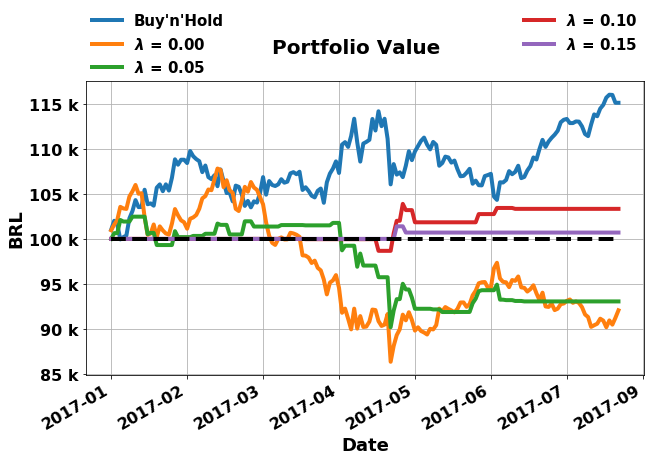

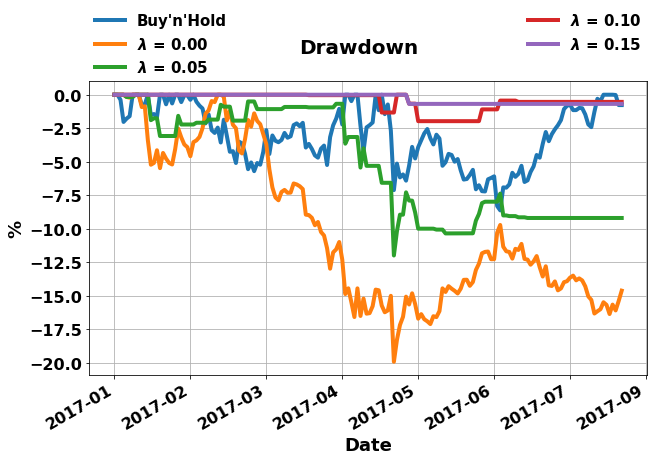

In [20]:
assetsToUse2 = [
               'ABEV3', 
               #'BRFS3', 
               #'BVMF3',
               #'CCRO3',
               #'ELET3',
               #'ITUB4', 
               #'KROT3', 
               #'LAME4', 
               #'PETR4', 
               #'SUZB5', 
               #'USIM5', 
               #'VALE5',
               #'VIVT4'
              ]

bt2.simulate(strategy = 'buy-n-hold', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2, verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
             orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
             confidenceLimit = 0.0, simulationName = 'predicted_bin_mlp_minmax_0.0', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
             orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
            confidenceLimit = 0.05, simulationName = 'predicted_bin_mlp_minmax_0.05', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
            confidenceLimit = 0.1, simulationName = 'predicted_bin_mlp_minmax_0.1', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_MLP_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_MLP_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_MLP_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_MLP_mapminmax'],'ELET3': df['ELET3_bin_predicted_MLP_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_MLP_mapminmax'],'KROT3': df['KROT3_bin_predicted_MLP_mapminmax'],'LAME4': df['LAME4_bin_predicted_MLP_mapminmax'],'PETR4': df['PETR4_bin_predicted_MLP_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_MLP_mapminmax'],'USIM5': df['USIM5_bin_predicted_MLP_mapminmax'],'VALE5': df['VALE5_bin_predicted_MLP_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_MLP_mapminmax']},
            confidenceLimit = 0.15, simulationName = 'predicted_bin_mlp_minmax_0.15', verbose = 0)

simulations = ['buy-n-hold', 'predicted_bin_mlp_minmax_0.0', 'predicted_bin_mlp_minmax_0.05', 'predicted_bin_mlp_minmax_0.1', 'predicted_bin_mlp_minmax_0.15']
names = ['Buy\'n\'Hold', r'$\lambda$ = 0.00', r'$\lambda$ = 0.05', r'$\lambda$ = 0.10', r'$\lambda$ = 0.15']
bt2.plotSimulations(simulations = simulations, names = names,
                   legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 2,
                   saveImg = False, saveDir = saveFigDir, saveName = assetsToUse[0] + '_bin', saveFormat = 'png'
                  )
bt2.plotDrawdown(simulations, names, 
                 legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 2,
                 saveImg = False, saveDir = saveFigDir, saveName = assetsToUse2[0] + '_lim', saveFormat = 'png'
                )

In [ ]:
assetsToUse2 = [
               'ABEV3', 
               #'BRFS3', 
               #'BVMF3',
               #'CCRO3',
               #ELET3',
               #'ITUB4', 
               #'KROT3', 
               #'LAME4', 
               #'PETR4', 
               #'SUZB5', 
               #'USIM5', 
               #'VALE5',
               #'VIVT4'
              ]

bt2.simulate(strategy = 'buy-n-hold', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2, verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.0, simulationName = 'predicted_bin_sae_minmax_0.0', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.05,simulationName = 'predicted_bin_sae_minmax_0.05', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.1,simulationName = 'predicted_bin_sae_minmax_0.1', verbose = 0)

bt2.simulate(strategy = 'orders', start = startDate, end = endDate, initialFunds = initialFunds, assetsToUse = assetsToUse2,
            orders = {'ABEV3': df['ABEV3_bin_predicted_SAE_mapminmax'],'BRFS3': df['BRFS3_bin_predicted_SAE_mapminmax'],'BVMF3': df['BVMF3_bin_predicted_SAE_mapminmax'],'CCRO3': df['CCRO3_bin_predicted_SAE_mapminmax'],'ELET3': df['ELET3_bin_predicted_SAE_mapminmax'],'ITUB4': df['ITUB4_bin_predicted_SAE_mapminmax'],'KROT3': df['KROT3_bin_predicted_SAE_mapminmax'],'LAME4': df['LAME4_bin_predicted_SAE_mapminmax'],'PETR4': df['PETR4_bin_predicted_SAE_mapminmax'],'SUZB5': df['SUZB5_bin_predicted_SAE_mapminmax'],'USIM5': df['USIM5_bin_predicted_SAE_mapminmax'],'VALE5': df['VALE5_bin_predicted_SAE_mapminmax'],'VIVT4': df['VIVT4_bin_predicted_SAE_mapminmax']},
            confidenceLimit = 0.15,simulationName = 'predicted_bin_sae_minmax_0.15', verbose = 0)

simulations = ['buy-n-hold', 'predicted_bin_sae_minmax_0.0', 'predicted_bin_sae_minmax_0.05', 'predicted_bin_sae_minmax_0.1', 'predicted_bin_sae_minmax_0.15']
names  = ['Buy\'n\'Hold', r'$\lambda$ = 0.00', r'$\lambda$ = 0.05', r'$\lambda$ = 0.10', r'$\lambda$ = 0.15']
bt2.plotSimulations(simulations = simulations, names = names, 
                   legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 2,
                   saveImg = False, saveDir = saveFigDir, saveName = assetsToUse[0] + '_bin', saveFormat = 'png'
                  )
bt2.plotDrawdown(simulations, names, 
                 legendsize = 15, linewidth = 4.0, figsize = (10,6), linestyle = '-', legendncol = 2,
                 saveImg = False, saveDir = saveFigDir, saveName = assetsToUse2[0] + '_lim', saveFormat = 'png'
                )